# Analysis of the data of Airbnb

This data is used to understand the trend of Airbnb by using the CRISP-DM, I am trying to understand the trend of data and get the answer to some question for that data


# CRISP-DM :
CRISP-DM process is to understand what you want to accomplish from a business perspective. Your organisation may have competing objectives and constraints that must be properly balanced. The goal of this stage of the process is to uncover important factors that could influence the outcome of the project. Neglecting this step can mean that a great deal of effort is put into producing the right answers to the wrong questions.
### STEPS of CRISP-DM
#### 1. Business Understanding
#### 2. Data Understanding
#### 3. Prepare Data
#### 4. Data Modeling
#### 5. Evaluate the Results
#### 6. Deploy

### Find out the answers to the question
1. Which type of Property is more reviews per month by the AirBNB customers?
2. Which is the most demanded place in Amsterdam?
3. Which type of room is more preferable by the Airbnb customers?
4. Neighbourhood Cleansed.
5. Most liked property type. 
6. The average price of Rooms.
7. Average price depending on neighborhood
8. Response time of the host.
 
To find out the answer to these questions we want to use the CRISP-DM method. by using this method we get answers very efficiently.


#### This is the explanation of the library and its purpose :

Numpy is a numerical python library. It contains a multi-dimensional array and matrix data structures. It can be utilized to perform a number of mathematical operations on arrays such as trigonometric, statical and algebraic routines.

pandas is used for manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

Matplotlib is a plotting library and its numerical mathematics extension Numpy. 
Matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB 

Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Statistics is the library of statistical types, data, and functions. It provides a common function and types useful in statistics. 

%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

The Counter holds the data in an unordered collection, just like hashtable objects. The elements here represent the keys and the count as values. It allows you to count the items in an iterable list. Arithmetic operations like addition, subtraction, intersection, and union can be easily performed on a Counter

In [1]:
# loading some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import statistics
from collections import Counter

%matplotlib inline

### A. Read the Data

## 1. Business Understanding :

Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.

Business understanding is what are the business objectives? and what am I trying to optimize? these are the questions we want to remember at the start of business understanding. After that, we go forward.


In [2]:
# load the listing data
df = pd.read_csv('listings.csv')
df.head()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200416183828,2020-04-19,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.06
1,20168,https://www.airbnb.com/rooms/20168,20200416183828,2020-04-18,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.76
2,25428,https://www.airbnb.com/rooms/25428,20200416183828,2020-04-18,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,"This nicely furnished, newly renovated apt is...",Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.18
3,27886,https://www.airbnb.com/rooms/27886,20200416183828,2020-04-19,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.15
4,28871,https://www.airbnb.com/rooms/28871,20200416183828,2020-04-19,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.82


This data is from the 'listing.csv' file. We read the first five rows of data for understanding whats insides.

In this data we get the information about the host, client, booking time, booking date, a client used which type of rooms, and the host area, neighborhood, cancellation_policy, city, state, a different type of prices, availability, reviews

In [3]:
# load the Calendar data
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,193038,18/04/2020,t,$75.00,$75.00,3.0,1125.0
1,2818,19/04/2020,f,$69.00,$69.00,3.0,1125.0
2,2818,20/04/2020,t,$59.00,$59.00,3.0,1125.0
3,2818,21/04/2020,t,$59.00,$59.00,3.0,1125.0
4,2818,22/04/2020,t,$59.00,$59.00,3.0,1125.0


This data is from the 'Calendar.csv' file. We read the first five rows of data for understanding whats insides.

In [4]:
# load the Review data
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


This data is from the 'reviews.csv' file. We read the first five rows of data for understanding whats insides.

## 2. Data Understanding :

Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

In data understanding, we want to clear about some questions, What is the quantity and quality of data? , what do different data items represent? and which data is relevant o the objective?


In [5]:
# Total size of data(rows * columns)
df.shape

(19362, 106)

In This "listing.csv" we get rows = 19362 and columns = 106

In [6]:
# Total size of calendar data(rows * columns)
df_calendar.shape

(1048575, 7)

In This "calendar.csv" we get rows = 1048575 and columns = 7

In [7]:
# total size of reviews data( rows * cloumns)
df_reviews.shape

(489777, 2)

In This "reviews.csv" we get rows = 489777 and columns = 2

### B. Clean the data

In [8]:
# finding of the missing value of data

missing_data = df.isnull()
missing_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
19358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
19359,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
19360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Here we want to understand the meaning of data "True" means there is missing data/value and "False" means the data is present.

In [9]:
# finding of the missing value of calendar data
missing_calendar_data = df_calendar.isnull()
missing_calendar_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False


Here we want to understand the meaning of data "True" means there is missing data/value and "False" means the data is present.

In [10]:
# finding of the missing value of data
missing_reviews_data = df_reviews.isnull()
missing_reviews_data

,listing_id,date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
489772,False,False
489773,False,False
489774,False,False
489775,False,False


Here we want to understand the meaning of data "True" means there is missing data/value and "False" means the data is present.

## 3. Data Preparation :

The data preparation phase covers all activities to construct the final dataset from the initial raw data.



In [11]:
# droping the null values form data
df.dropna(axis = 0, how = 'any')
df.head()

df_calendar.dropna(axis = 0, how = 'any')

df_reviews.dropna(axis = 0, how = 'any')

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25
...,...,...
489772,42934529,2020-03-21
489773,42934922,2020-03-26
489774,42947577,2020-03-20
489775,43031829,2020-04-05


Here we drop the data at any position we get none value.

In [12]:
# counting index data
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [13]:
# counting index of calendar
df_calendar.columns.values

array(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'], dtype=object)

In [14]:
# # counting index of reviews
df_reviews.columns.values

array(['listing_id', 'date'], dtype=object)

Above code give us the list of column index. From that listing, we understand that how many types of columns we have and how to use them to analyze the data and getting the answer to our problems.

## 4. Modeling

Modeling techniques are selected and applied.  Since some techniques like neural nets have specific requirements regarding the form of the data, there can be a loop back here to data prep.Modeling techniques are selected and applied.  Since some techniques like neural nets have specific requirements regarding the form of the data, there can be a loop back here to data prep.


### C. Describing Data

In [15]:
# describe the data
df.describe(include = "all")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.936200e+04,19362,1.936200e+04,19362,19329,18767,14255,19135,19362,13415,...,19362,19362,19362,19362,19362,19362.000000,19362.000000,19362.000000,19362.000000,17078.000000
unique,NaN,19362,NaN,5,18869,18259,13869,18885,1,12290,...,2,1,5,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/24731980,NaN,2020-04-17,Amsterdam,The hotel is located in a historic building wi...,I'm sure you will enjoy your stay at my place.,Hotel Jansen is a new Short Stay hotel in Amst...,none,Oud West is close to the city-centre and close...,...,f,f,strict_14_with_grace_period,f,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,8323,36,15,26,13,19362,37,...,14296,19362,7626,19158,19098,NaN,NaN,NaN,NaN,NaN
mean,1.973676e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.991117,1.491168,0.410495,0.004907,0.826230
std,1.204482e+07,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.588993,4.349848,1.277987,0.078902,1.337525
min,2.818000e+03,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.830531e+06,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.190000
50%,1.874661e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,2.900125e+07,NaN,2.020042e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.860000


In [16]:
# describe the calendar data
df_calendar.describe(include = "all")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,1.048575e+06,1048575,1048575,1048575,1048575,1.048391e+06,1.048391e+06
unique,NaN,368,2,620,633,NaN,NaN
top,NaN,24/09/2020,f,$150.00,$150.00,NaN,NaN
freq,NaN,2873,814503,64304,64301,NaN,NaN
mean,2.854414e+06,NaN,NaN,NaN,NaN,4.675444e+00,5.535580e+02
std,1.731692e+06,NaN,NaN,NaN,NaN,2.300275e+01,5.745057e+02
min,2.818000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.262157e+06,NaN,NaN,NaN,NaN,2.000000e+00,2.100000e+01
50%,2.849298e+06,NaN,NaN,NaN,NaN,3.000000e+00,3.600000e+02
75%,4.286134e+06,NaN,NaN,NaN,NaN,4.000000e+00,1.125000e+03


The above ".describe" code gives us the number of count, mean, standard deviation, minimum, maximum, frequent numbers, unique values, 25%, 50%, 75%
means the description of all the data.

## 5. Evaluation

Once one or more models have been built that appear to have high quality based on whichever loss functions have been selected, these need to be tested to ensure they generalize against unseen data and that all key business issues have been sufficiently considered.  The end result is the selection of the champion model(s).



### D. Analysis

## 1. Which type of Property gets more reviews per month by the Airbnb customers? 

In [17]:
df.groupby(['property_type']).mean()['reviews_per_month'].sort_values().dropna()

property_type
Earth house           0.060000
Dome house            0.090000
Lighthouse            0.130000
Yurt                  0.140000
Bus                   0.330000
Tipi                  0.360000
Cottage               0.536000
Camper/RV             0.610000
Campsite              0.660000
Apartment             0.706358
House                 0.752148
Aparthotel            0.762375
Condominium           0.828251
Chalet                0.920000
Bungalow              0.940000
Loft                  0.974164
Villa                 0.987667
Townhouse             0.998861
Barn                  1.006667
Tiny house            1.045714
Boutique hotel        1.110286
Castle                1.190000
Serviced apartment    1.245763
Boat                  1.319169
Island                1.330000
Houseboat             1.545213
Other                 1.824167
Farm stay             2.131429
Cabin                 2.154444
Bed and breakfast     2.170083
Guesthouse            2.208649
Hotel                 2.2

From data understanding we use the group by a method by that method we get the which type of property get more reviews per month and more liked by the client. In this, we use the mean of property type with the reviews per month. And we get the answer to our first question.

#### Hostels get more reviews per month than any other type of Property liked by the customers of Airbnb and it gets the reviews per month = 8.5

In [18]:
df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].describe

<bound method NDFrame.describe of          price weekly_price monthly_price security_deposit cleaning_fee
0       $59.00          NaN     $1,500.00          $200.00       $60.00
1      $100.00          NaN           NaN              NaN          NaN
2      $125.00      $650.00     $2,000.00          $300.00       $40.00
3      $155.00      $810.00     $2,500.00            $0.00        $0.00
4       $75.00      $499.00     $1,956.00              NaN          NaN
...        ...          ...           ...              ...          ...
19357   $80.00          NaN           NaN              NaN          NaN
19358   $45.00          NaN           NaN            $0.00       $15.00
19359  $160.00          NaN           NaN              NaN          NaN
19360  $149.00          NaN           NaN          $750.00       $60.00
19361   $69.00          NaN           NaN              NaN          NaN

[19362 rows x 5 columns]>

Here we describe some specific columns to analyze the price relation.

In [19]:
# host locations 
df.host_location

0        Amsterdam, Noord-Holland, The Netherlands
1        Amsterdam, Noord-Holland, The Netherlands
2                New York, New York, United States
3        Amsterdam, Noord-Holland, The Netherlands
4        Amsterdam, Noord-Holland, The Netherlands
                           ...                    
19357        Amsterdam, North Holland, Netherlands
19358        Amsterdam, North Holland, Netherlands
19359                                        Spain
19360        Amsterdam, North Holland, Netherlands
19361                                           NL
Name: host_location, Length: 19362, dtype: object

Here we get the number of locations in Amsterdam.

## 2. Which host locations are more demanded in Amsterdam?

In [20]:
# Explore Categorical Feature - host_location
df_hostlocation =('Value counts for host_location: ', df['host_location'].value_counts())
df_hostlocation

('Value counts for host_location: ',
 Amsterdam, North Holland, Netherlands         10511
 Amsterdam, North Holland, The Netherlands      3819
 NL                                             1646
 Amsterdam, Noord-Holland, The Netherlands      1296
 Netherlands                                     514
                                               ...  
 Pingjum, Friesland, Netherlands                   1
 Prague, Hlavní město Praha, Czech Republic        1
 Delft, South Holland, Netherlands                 1
 Shela, Lamu County, Kenya                         1
 Amsterdam, New York, United States                1
 Name: host_location, Length: 561, dtype: int64)

In this step, we count the number of bookings which organized by its locations.From this arrangement, the number of bookings from the places we get information about the most demanded place for customers in Amsterdam.

#### North-Holland, Netherlands is the most demanded place in Amsterdam for  Airbnb.
#### Number of hosts in Amsterdam_north holland_netherlands = 10511

## 3. Which type of rooms is more preferable by the customer of Airbnb?

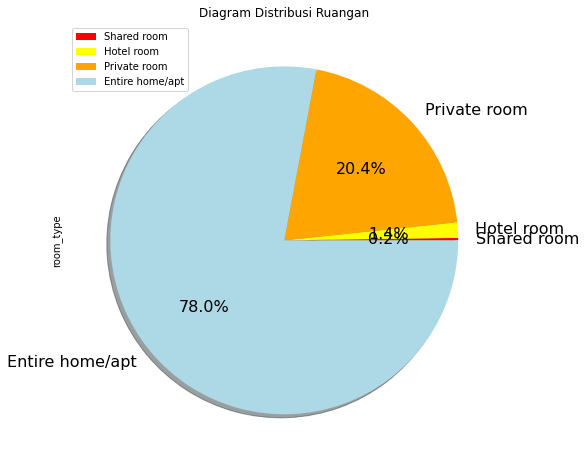

In [21]:
room = df.room_type
r = Counter(room)


room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

colors_list = ['red', 'yellow', 'orange', 'lightblue', 'lightgreen']
room_df.plot.pie(y = 'room_type', 
                 
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%1.1f%%',
                 colors=colors_list,
                 legend = True,
                 shadow=True,
                 title = 'Diagram Distribusi Ruangan')

This questing gives us information about the most demanded type of rooms/home in Amsterdam. To visualize that we use the pie chart. In that pie chart, we get the biggest piece of a circle which is 78% for the entire home or apartment means most of the peoples are prefer to take an entire home/ apartment on rent. In the second place we get 20.4% for a private room, third place with 1.4% Hotel rooms and at last with 0.2 people prefer to take shared rooms.  

#### The entire home or apartment is more preferable by the customers.

## 4. Neighbourhood Cleansed?

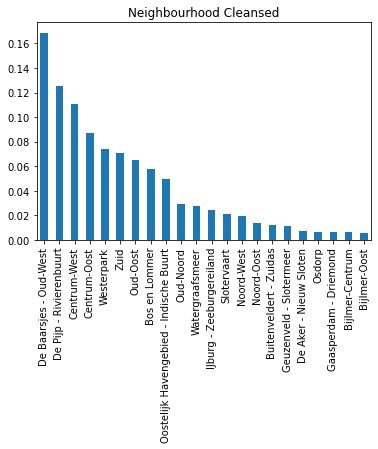

In [22]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = df['neighbourhood_cleansed'].value_counts()
(neigh_vals/df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Cleansed");


From that graph, we get the answer to the fourth question.
Customers prefer to take a room on rent from some specific area in Amsterdam out of all. Which is depending on the cleansed of that area and the nearest to all the important areas.

#### De Baarsjes - Oud-West is the place which get the more number of bookings than any other places in Amsterdam 

## 5. Most liked property type? 

In [23]:
df_property = df['property_type'].value_counts()

df_property

Apartment                 14679
House                      1631
Townhouse                   669
Bed and breakfast           383
Loft                        371
Condominium                 340
Boat                        323
Houseboat                   310
Guest suite                 148
Aparthotel                  121
Serviced apartment           75
Hotel                        57
Boutique hotel               46
Guesthouse                   38
Villa                        37
Other                        32
Hostel                       28
Tiny house                   14
Cottage                      13
Cabin                        11
Farm stay                     7
Bungalow                      5
Barn                          4
Camper/RV                     3
Earth house                   2
Chalet                        2
Island                        2
Yurt                          2
Campsite                      2
Casa particular (Cuba)        2
Tipi                          1
Castle  

In the third question, we get the answer of home/apartment but we didn't get an answer from out of two which we get more information about the number of bookings and the number of bookings by descending order by its types.

#### House is the most liked property type of customers. And the number of Apartment booking is 14679

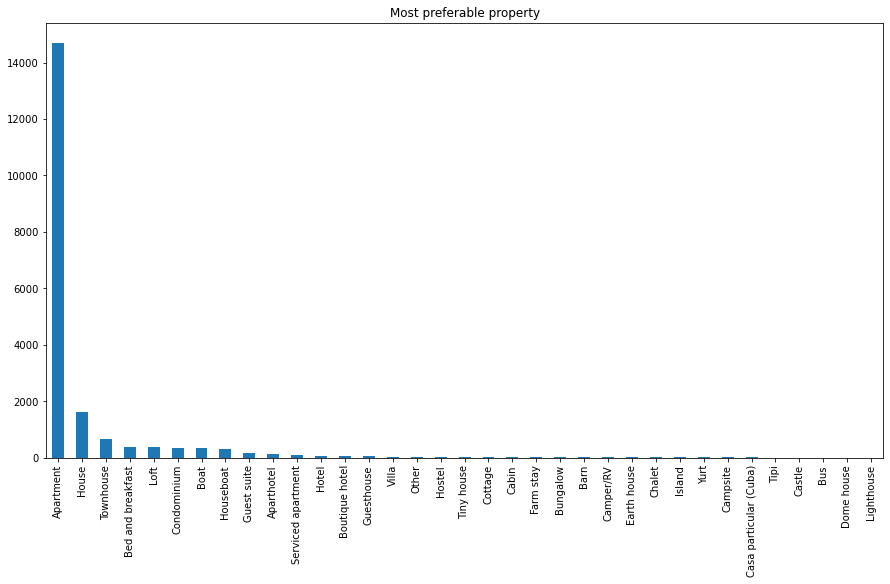

In [24]:
df_property.plot.bar(x = 'property_type',
                          y = 'number_of_listings',
                          figsize = (15, 8),
                          title = 'Most preferable property',
                          legend = False)

In this graph, we get a clear view of the booking of property type.

In [25]:
df_price = df['price'].value_counts()
df_price

$150.00      1302
$100.00      1013
$120.00       907
$200.00       787
$125.00       615
             ... 
$318.00         1
$191.00         1
$14.00          1
$1,050.00       1
$1,390.00       1
Name: price, Length: 452, dtype: int64

From that code, we get the information on which prices is more number of  booking.


#### In the first posting, we get 150$ and the number of booking for that is 1302, like that onwards next in descending order.

## 6. The average price of Rooms?

In [26]:
# Average price
df_price.mean().sum()

42.836283185840706

From all the prices of room booking we get the average price of booking which is calculate as sum(booking_price)/len(bookings)

The Average price for a room is 42.83

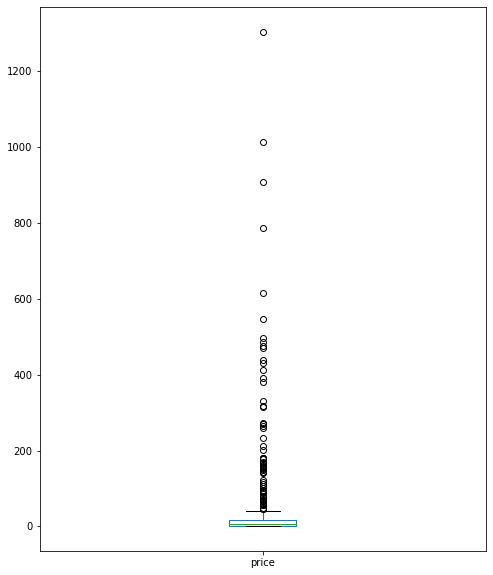

In [27]:
df_price.plot(kind = "box", figsize = (8,10))

This graph is for the mean price of rooms.

##  7. The average price of area depending on the neighborhood?

                                             price
neighbourhood_cleansed                            
Centrum-Oost                            225.761679
Centrum-West                            225.150679
Zuid                                    182.685131
IJburg - Zeeburgereiland                169.226782
Oud-Noord                               169.191228
De Pijp - Rivierenbuurt                 168.312990
Westerpark                              152.896792
Buitenveldert - Zuidas                  152.795833
De Baarsjes - Oud-West                  151.462056
Watergraafsmeer                         146.838649
Oud-Oost                                146.694071
De Aker - Nieuw Sloten                  144.534247
Oostelijk Havengebied - Indische Buurt  137.800000
Noord-Oost                              131.496296
Noord-West                              128.874016
Geuzenveld - Slotermeer                 127.506726
Bos en Lommer                           123.933333
Slotervaart                    

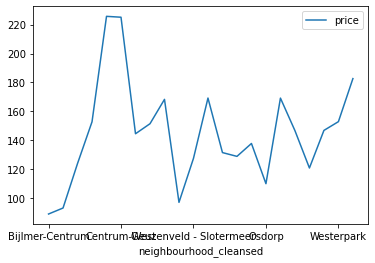

In [28]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

print(df.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

From the above code and graph, we get the average price for the specific area which is dependent on the neighborhood cleansed and the demand of that area.

#### Max average price is  225.76 of centrum_oost which depends on the neighbourhood_cleansed

In [29]:
# Type of beds counts

df_bed_types= df['bed_type'].value_counts()
df_bed_types

Real Bed         19212
Pull-out Sofa      101
Futon               32
Airbed              12
Couch                5
Name: bed_type, dtype: int64

In this code, we get the information about the number of beads and which type of bed  get what type of numbers, at first postiton is Real Bed with 19212, at second pull-out sofa with 101, at third position futon with 32, at fourth Airbed with 12 and at last Couch with 5.

In [30]:
# extracharges for extra peoples in rooms 

df_extrapeople = df['extra_people'].value_counts()
df_extrapeople

$0.00      13272
$25.00       958
$50.00       766
$30.00       752
$20.00       714
           ...  
$266.00        1
$210.00        1
$83.00         1
$175.00        1
$97.00         1
Name: extra_people, Length: 108, dtype: int64

From that code, we get the information on how many the number of rooms is present in which we get free entry for one person, or in some room, there are specific charges for extra a person.

#### The number of rooms in which extra a person gets free entry is 13272.

In [31]:
# Correlation between some columns.
df_corr = df[['monthly_price', 'reviews_per_month', 'availability_30','availability_60','availability_90', 'availability_365',
   'minimum_nights', 'maximum_nights', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']]
df_corr

,monthly_price,reviews_per_month,availability_30,availability_60,availability_90,availability_365,minimum_nights,maximum_nights,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,"$1,500.00",2.06,29,59,89,169,3,15,59.0,NaN,"$1,500.00",$200.00,$60.00
1,NaN,2.76,0,0,29,106,1,365,100.0,NaN,NaN,NaN,NaN
2,"$2,000.00",0.18,19,22,22,132,14,180,125.0,$650.00,"$2,000.00",$300.00,$40.00
3,"$2,500.00",2.15,14,22,32,172,2,730,155.0,$810.00,"$2,500.00",$0.00,$0.00
4,"$1,956.00",2.82,25,44,52,210,2,1825,75.0,$499.00,"$1,956.00",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,NaN,NaN,7,12,18,18,3,1125,80.0,NaN,NaN,NaN,NaN
19358,NaN,NaN,12,12,12,12,7,1125,45.0,NaN,NaN,$0.00,$15.00
19359,NaN,NaN,30,60,90,365,1,1125,160.0,NaN,NaN,NaN,NaN
19360,NaN,NaN,26,41,48,48,7,60,149.0,NaN,NaN,$750.00,$60.00


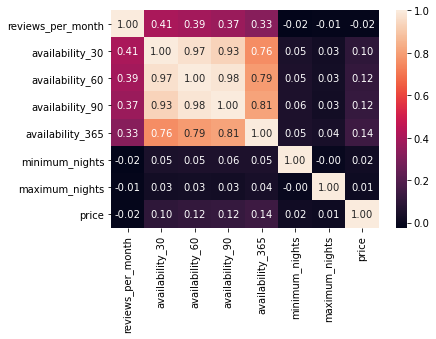

In [32]:
sns.heatmap(df_corr.corr() , annot = True, fmt = ".2f" )

Above the heatmap of the correlation of monthly price, reviews per month, availability 30, availability 60, availability 90, availability 365, minimum nights, maximum nights, price, weekly price, monthly price, security deposit, cleaning fee.

## 8. Response time of the host.

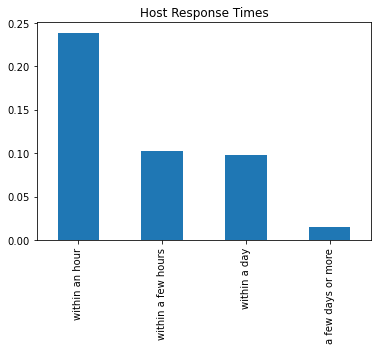

In [33]:
host_response_vals = df['host_response_time'].value_counts()
(host_response_vals/df.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

This the the average of response time of the host on the request of customesr.

#### The maximum response time of the host is less an hour.

In [34]:
# number of booking on specific dates
df_calendar_dates = df_calendar['date'].value_counts()
df_calendar_dates

24/09/2020    2873
04/09/2020    2873
13/06/2020    2873
27/07/2020    2873
30/08/2020    2873
              ... 
18/04/2020    2383
17/04/2021    1655
17/04/2020    1285
18/04/2021     657
19/04/2021       2
Name: date, Length: 368, dtype: int64

## 6. Deployment

Generally this will mean deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and to create a mechanism for the use of that new information in the solution of the original business problem.  Importantly, the code representation must also include all the data prep steps leading up to modeling so that the model will treat new raw data in the same manner as during model development.

You may well observe that there is nothing special here and that’s largely true.  From today’s data science perspective this seems like common sense.  This is exactly the point.  The common process is so logical that it has become embedded into all our education, training, and practice.

Text(0.5, 0, 'dates')

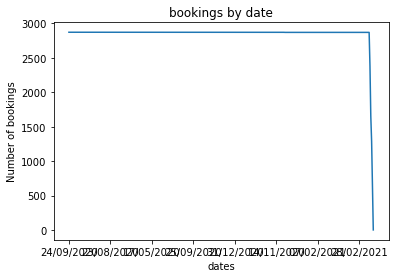

In [35]:

df_calendar_dates.plot(kind = "line")
plt.title('bookings by date')
plt.ylabel('Number of bookings')
plt.xlabel('dates')

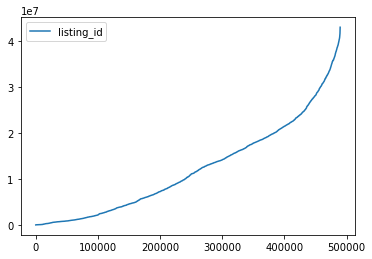

In [36]:
# reviwes of customers
df_reviews.plot(kind = 'line')

## Conclusion :


By using the CRISP-DM method we get the answers to our questions.
From the data we get some conclusions as follows,  hostels property type gets more reviews per month and it gets rating 8.5, at the second we get North-Holland, Netherlands is the most demanded place in Amsterdam fo Airbnb and the number of hosts booked in that area is 10511, at third, we get the information about the more preferable type of room is entire home/apartment which is 78 percent of entire rooms booking type. next, we get the information about the cleansed of the neighborhood, there is more demand for a specific area depending on neighborhood cleansed and the more demanded area is De Baarsjes-oud-west, next we get the information about the most liked property type out of all type which is Apartment and the number of bookings of that apartment is 14679, next we get the average price of all the rooms is equal to 42.83 dollars, and next, we get the average price of rooms for the specific area in that the maximum price is for centrum-oost which is 225.79$ for a room, then we get the types of beds in number wise descending order. and at second last
we get the information about the extra charges for the extra person. There 13272 room which wouldn't charge for an extra person. and at last we get the information about the response time of the host for a request of customers